In [9]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [10]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.common.exceptions import NoSuchElementException

options = Options()
#options.headless = True
b = webdriver.Chrome(options=options)

In [11]:
import time

In [12]:
b.get("https://tyler.caraza-harter.com/cs320/s20/materials/lec-19/page1.html")

# poll (check) until we have the data
for i in range(40):
    try:
        b.find_element_by_id("coords")
        break
    except NoSuchElementException:
        print("still waiting")
        time.sleep(0.25)

still waiting
still waiting
still waiting
still waiting


In [13]:
from bs4 import BeautifulSoup
page = BeautifulSoup(b.page_source)
tbls = page.find_all("table")
assert len(tbls) == 2

In [16]:
rows = []
for tr in tbls[1].find_all("tr"):
    rows.append([td.get_text() for td in tr.find_all("td")])
rows

[['x', 'y'],
 ['0', '1'],
 ['2', '3'],
 ['4', '5'],
 ['6', '7'],
 ['8', '9'],
 ['10', '11'],
 ['12', '13'],
 ['14', '15'],
 ['16', '17'],
 ['18', '19']]

In [17]:
import pandas as pd
pd.DataFrame(rows[1:], columns=rows[0])

,x,y
0,0,1
1,2,3
2,4,5
3,6,7
4,8,9
5,10,11
6,12,13
7,14,15
8,16,17
9,18,19


In [8]:
b.close()

In [18]:
options = Options()
#options.headless = True
b = webdriver.Chrome(options=options)

In [25]:
# page2.html
b.get("https://tyler.caraza-harter.com/cs320/s20/materials/lec-19/page2.html")

In [26]:
while True:
    try:
        btn = b.find_element_by_id("more")
    except NoSuchElementException:
        break
    btn.click()
    time.sleep(2)

In [27]:
from bs4 import BeautifulSoup
page = BeautifulSoup(b.page_source)
tbls = page.find_all("table")
assert len(tbls) == 1

In [28]:
b.close()

In [29]:
options = Options()
#options.headless = True
b = webdriver.Chrome(options=options)

In [30]:
# page3.html
b.get("https://tyler.caraza-harter.com/cs320/s20/materials/lec-19/page3.html")

In [31]:
btn = b.find_element_by_id("login_btn")
btn

<selenium.webdriver.remote.webelement.WebElement (session="4fdc27c540f3c1e6504e37e3f774e54d", element="0.2842643579606472-1")>

In [33]:
pw = b.find_element_by_id("password")
pw

<selenium.webdriver.remote.webelement.WebElement (session="4fdc27c540f3c1e6504e37e3f774e54d", element="0.2842643579606472-2")>

In [36]:
pw.clear()

In [37]:
pw.send_keys("fido")

In [38]:
btn.click()

In [39]:
b.close()

In [40]:
options = Options()
#options.headless = True
b = webdriver.Chrome(options=options)

In [41]:
# page4.html
b.get("https://tyler.caraza-harter.com/cs320/s20/materials/lec-19/page4.html")

In [42]:
year_box = b.find_element_by_id("year")
year_box

<selenium.webdriver.remote.webelement.WebElement (session="7841b63d5390db596bb759a7fdd61c78", element="0.24516250497320424-1")>

In [43]:
search_btn = b.find_element_by_id("search_btn")
search_btn

<selenium.webdriver.remote.webelement.WebElement (session="7841b63d5390db596bb759a7fdd61c78", element="0.24516250497320424-2")>

In [52]:
import pandas as pd

In [51]:
def hurricane_count(year):
    year_box.clear()
    year_box.send_keys(str(year))
    search_btn.click()
    
    trs = b.find_elements_by_tag_name("tr")
    return len(trs) - 1

hurricane_count(1950)

3

In [55]:
s = pd.Series()
for year in range(1950, 2020):
    s.loc[year] = hurricane_count(year)

In [59]:
import matplotlib
matplotlib.rcParams["font.size"] = 16

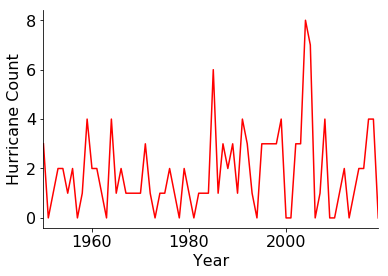

In [64]:
ax = s.plot.line(color="r")
ax.set_xlabel("Year")
ax.set_ylabel("Hurricane Count")
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)